In [138]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [139]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [140]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [141]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [142]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.00812440265471816


In [143]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


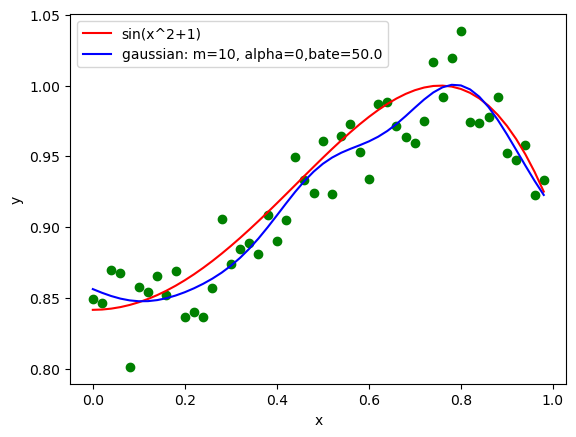

w:  [ 0.87941016 -0.01667897 -0.05309611  0.12186426 -0.22783904  0.31162783
 -0.18967586  0.07623153  0.11565944 -0.01726995]


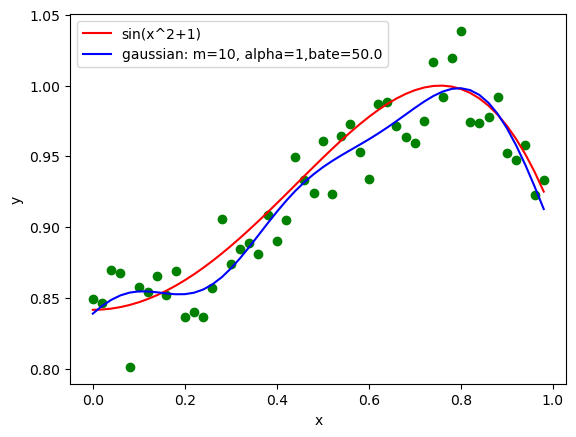

w:  [ 0.77038825  0.1078243  -0.05435329  0.03007931  0.06219932  0.04997449
  0.04647577  0.05685421  0.06479573  0.12215019]


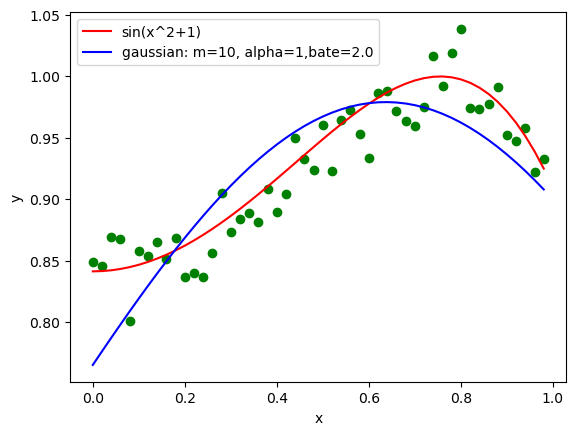

w:  [0.26718855 0.04614684 0.0415873  0.04311498 0.05142214 0.06643545
 0.08728786 0.11240173 0.13967207 0.16672178]


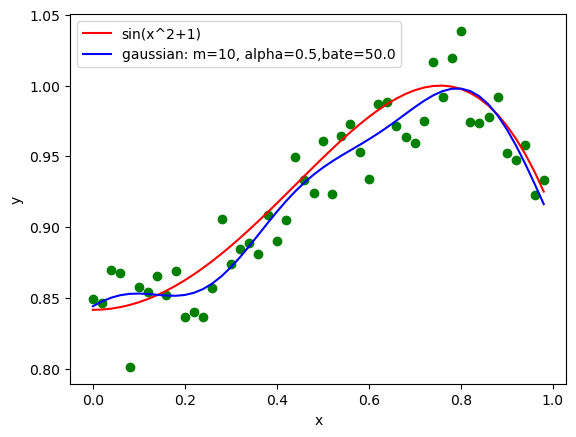

w:  [ 0.79652459  0.0796244  -0.04982394  0.0278927   0.040671    0.05593085
  0.0328699   0.04337607  0.07745038  0.09160539]


In [144]:
params = [(0.02, 0), (0.02, 1), (0.5, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



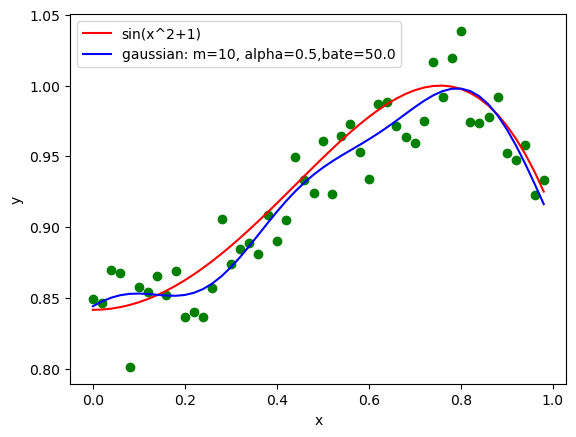

w:  [ 0.79652459  0.0796244  -0.04982394  0.0278927   0.040671    0.05593085
  0.0328699   0.04337607  0.07745038  0.09160539]


In [145]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

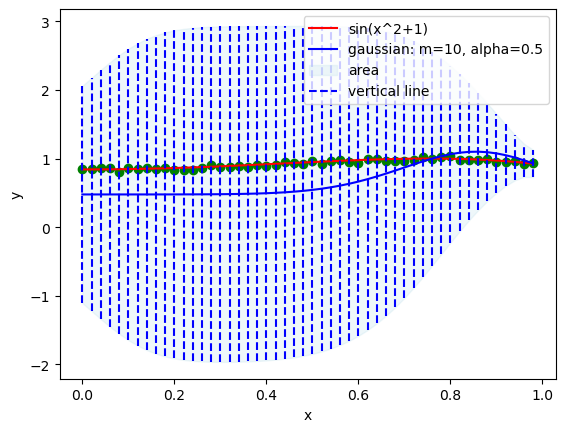

[49]
1


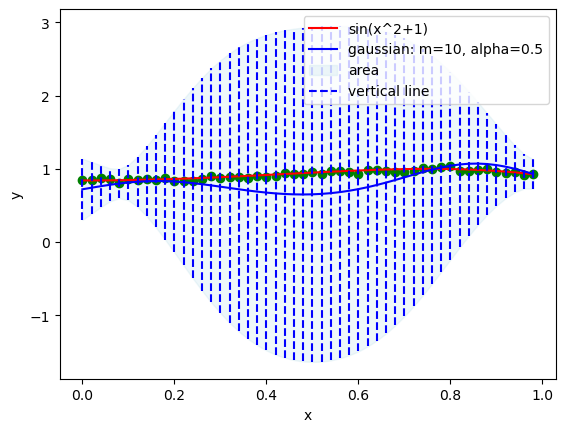

[49, 4]
2


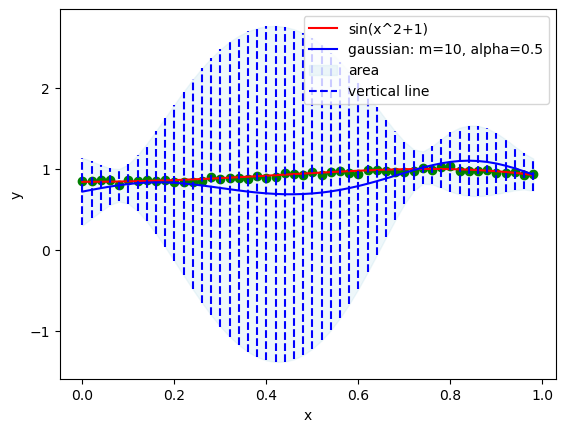

[49, 4, 37]
3


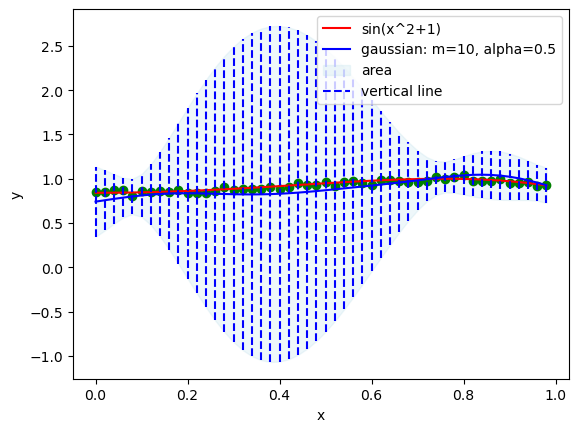

[49, 4, 37, 39]
4


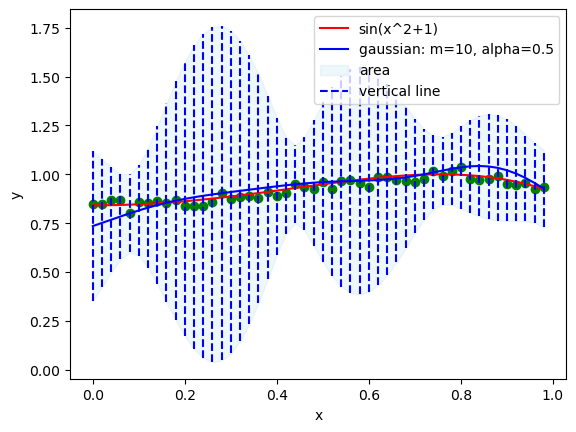

[49, 4, 37, 39, 22]
5


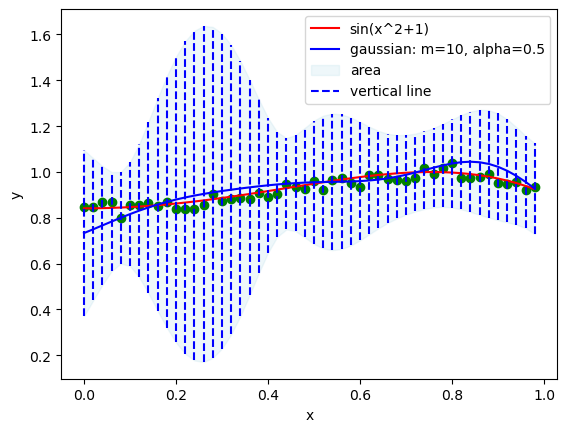

[49, 4, 37, 39, 22, 33]
6


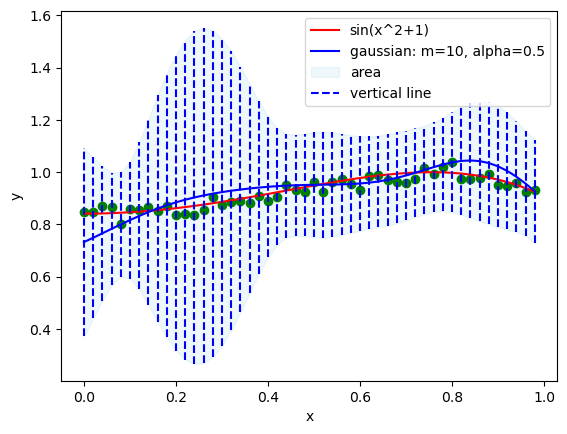

[49, 4, 37, 39, 22, 33, 29]
7


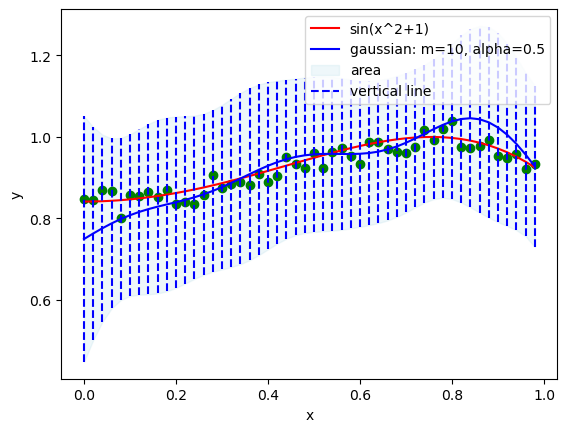

[49, 4, 37, 39, 22, 33, 29, 13]
8


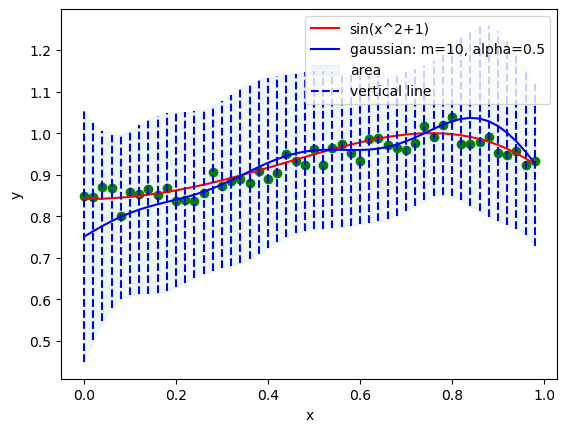

[49, 4, 37, 39, 22, 33, 29, 13, 38]
9


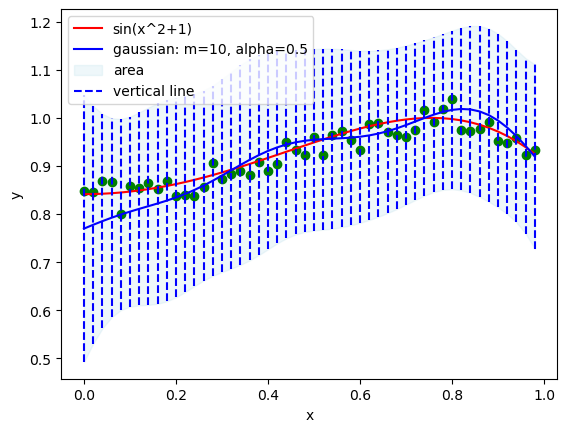

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44]
10


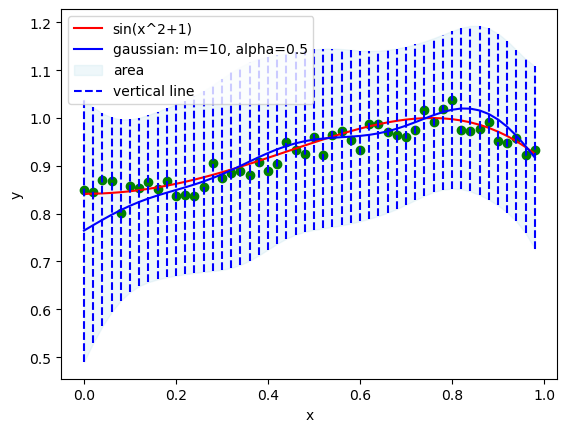

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8]
11


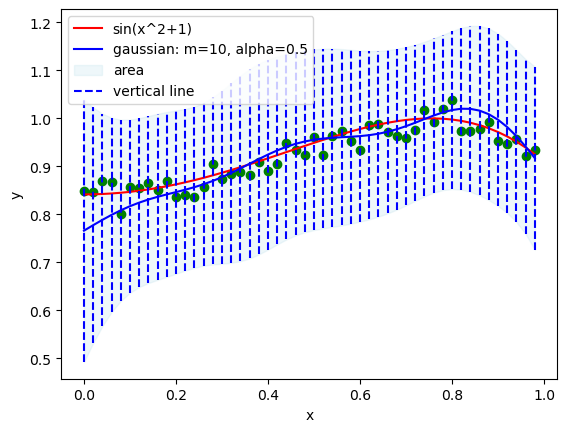

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13]
12


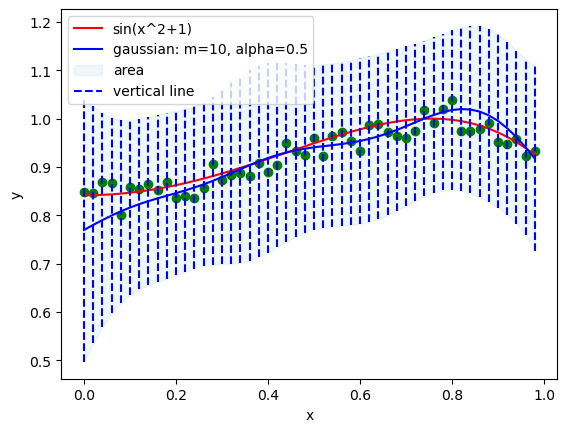

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26]
13


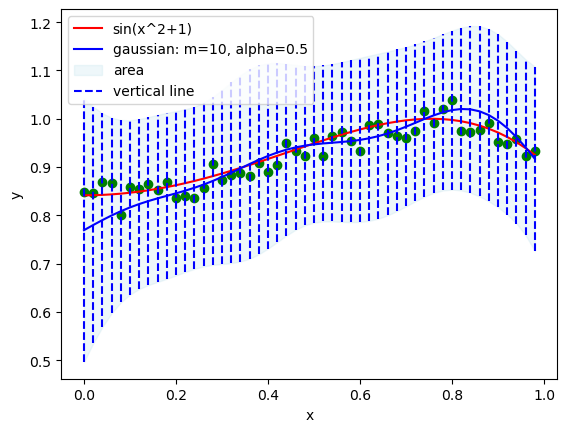

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25]
14


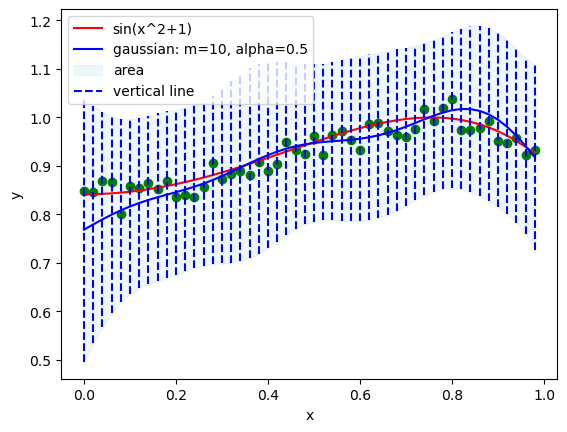

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38]
15


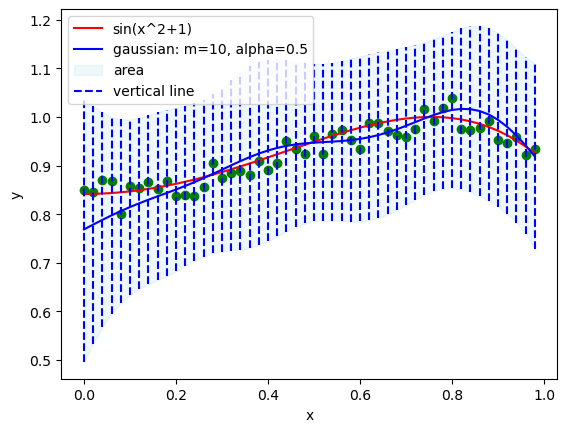

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14]
16


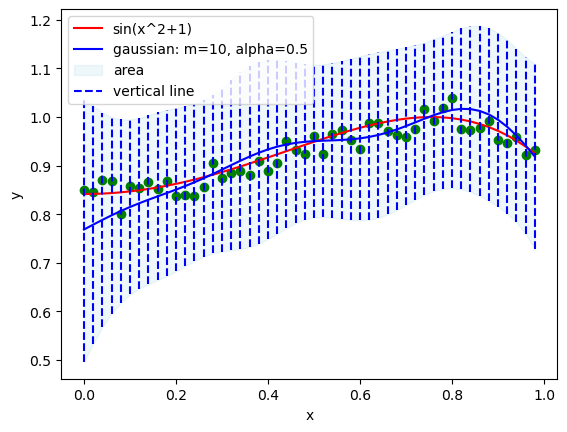

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25]
17


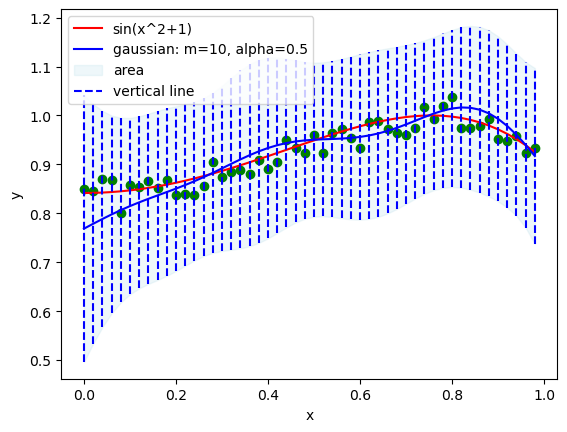

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47]
18


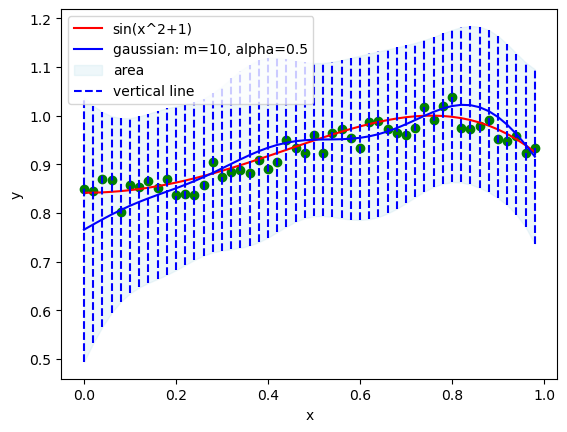

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40]
19


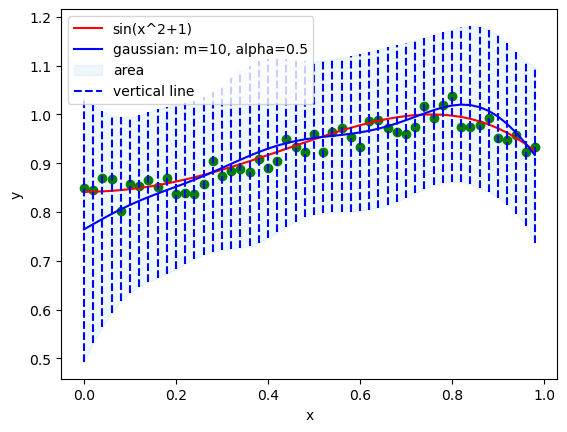

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31]
20


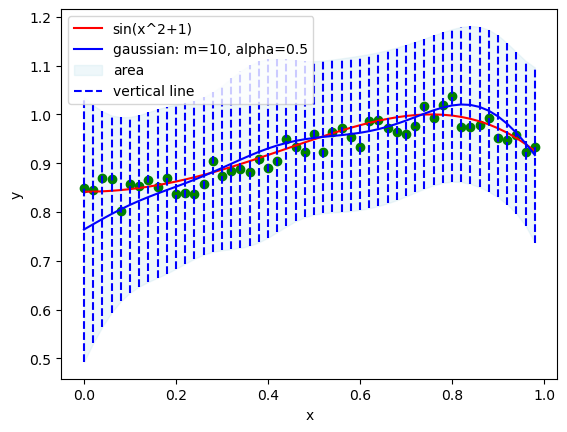

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33]
21


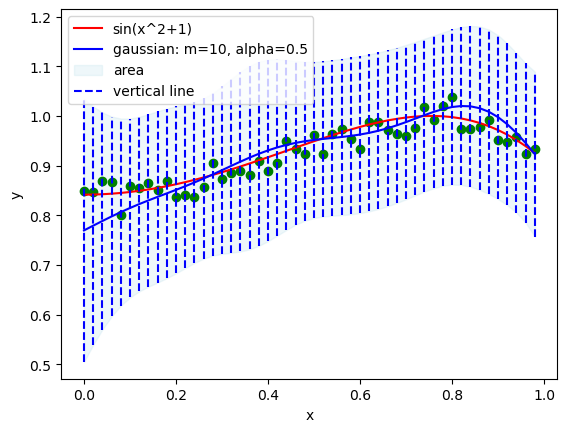

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49]
22


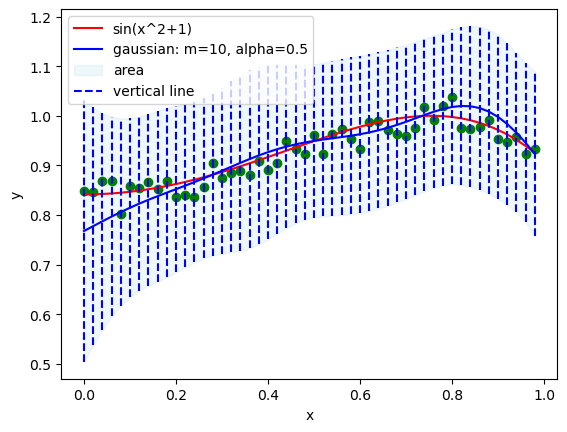

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23]
23


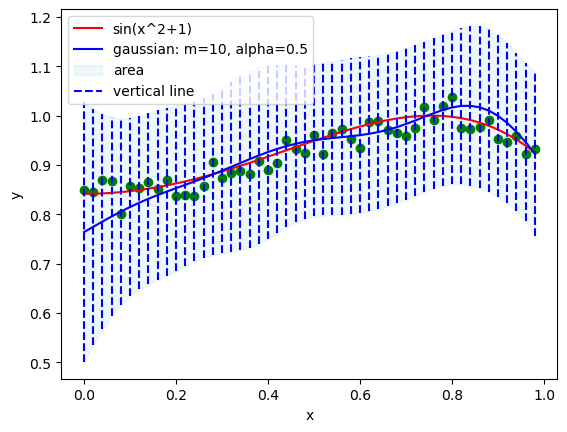

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35]
24


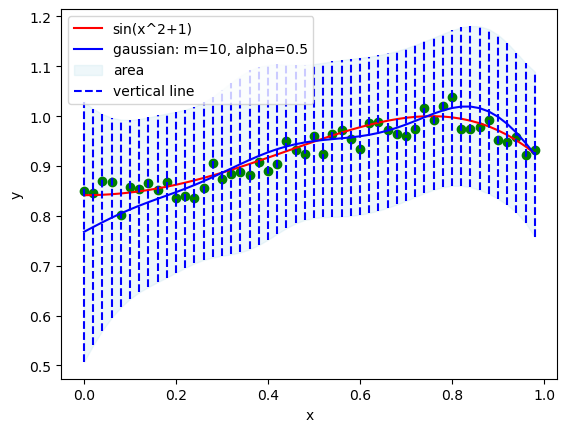

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11]
25


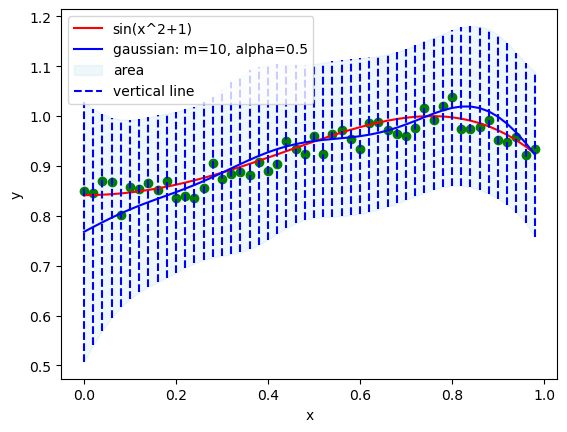

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33]
26


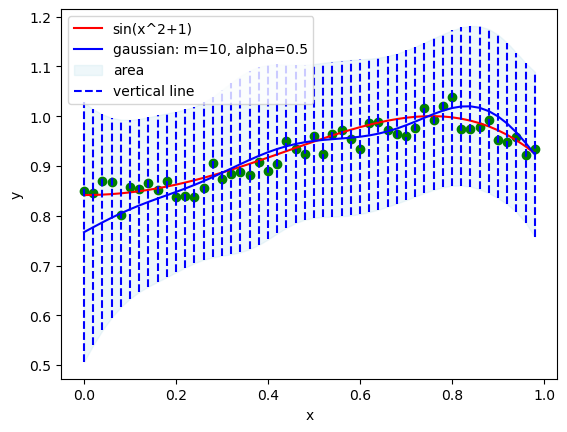

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34]
27


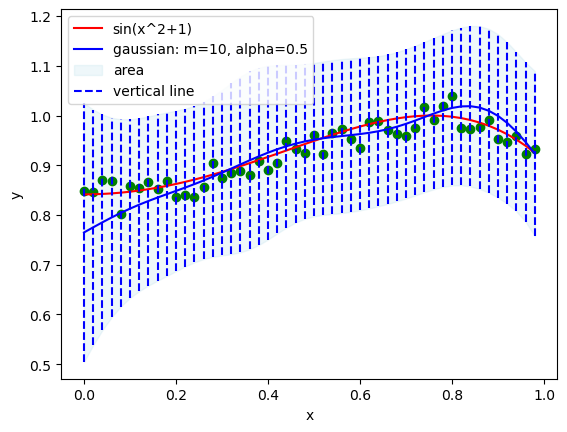

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31]
28


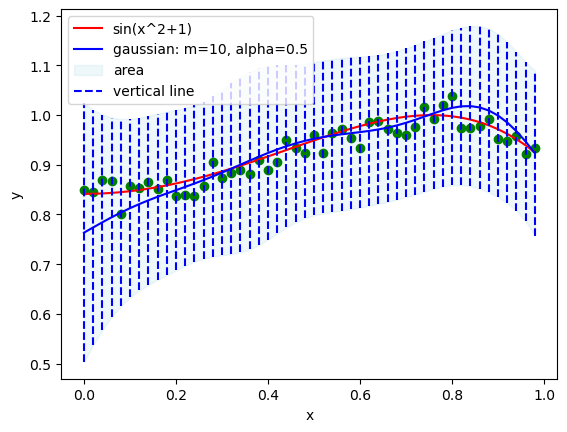

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31]
29


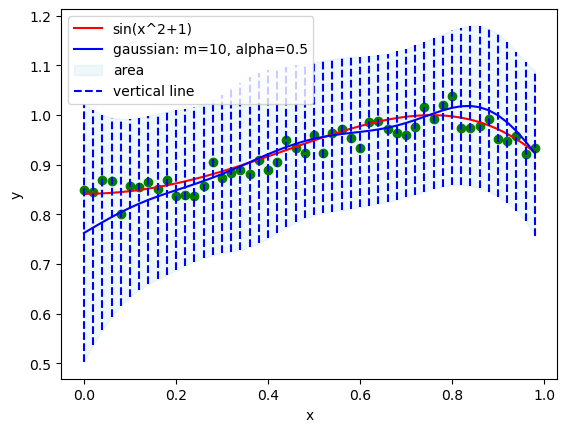

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15]
30


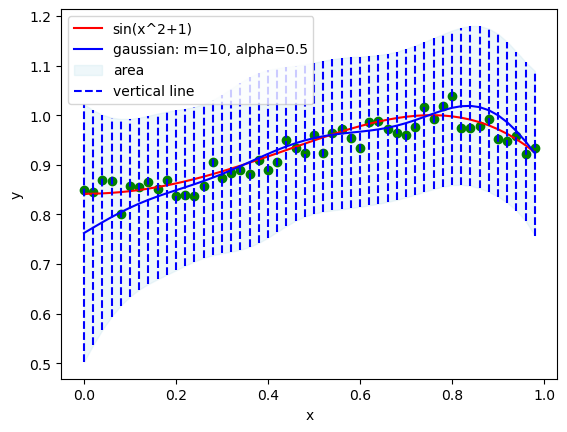

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25]
31


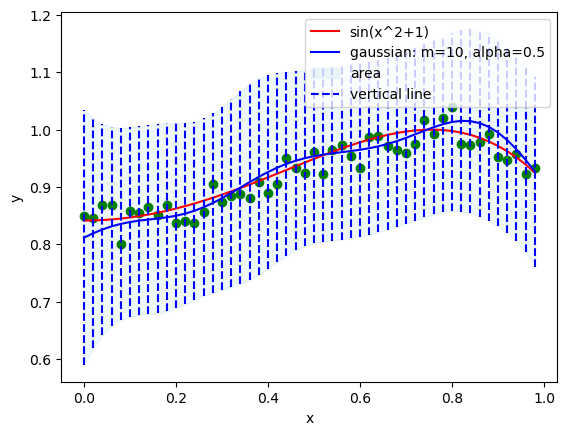

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3]
32


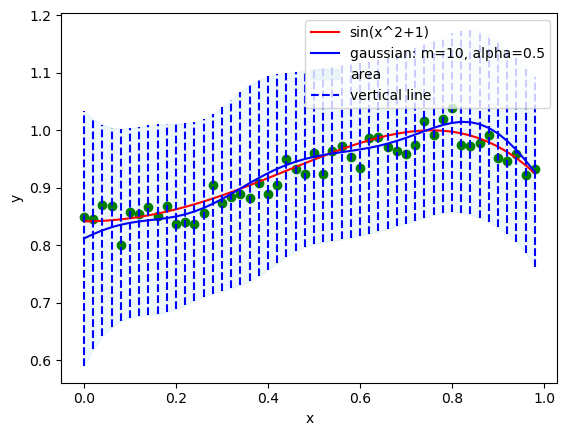

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32]
33


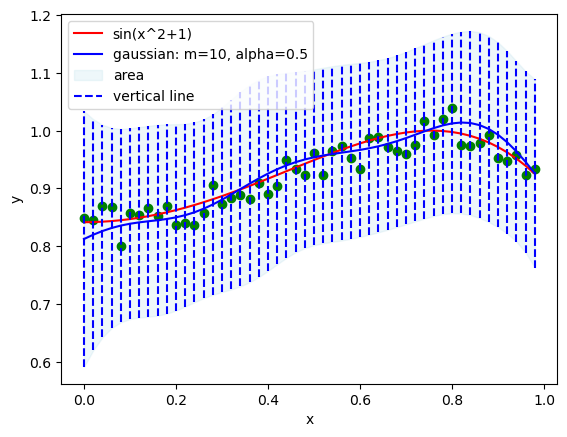

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47]
34


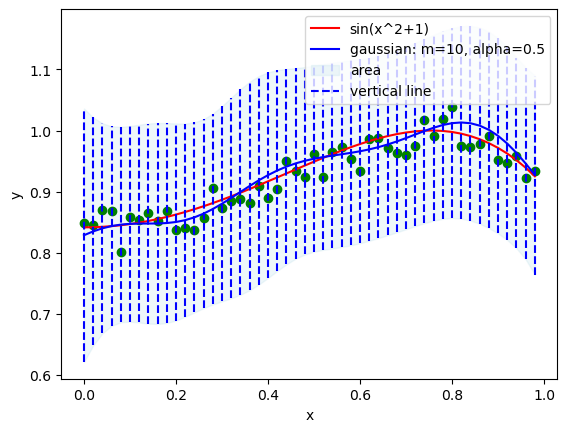

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3]
35


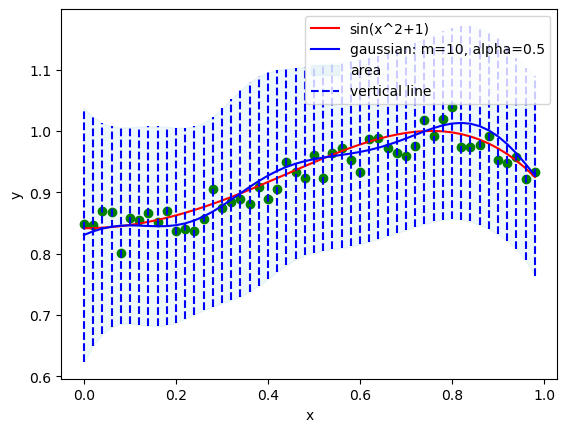

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12]
36


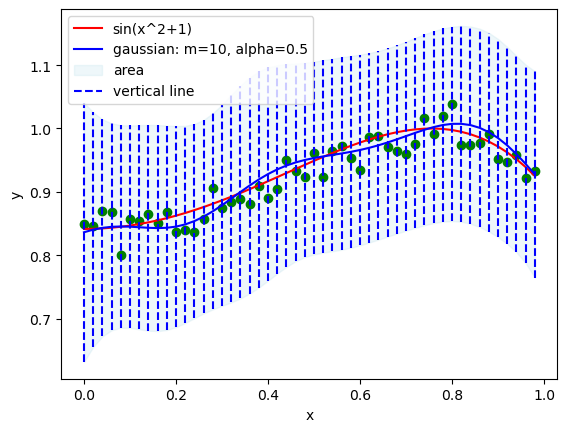

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43]
37


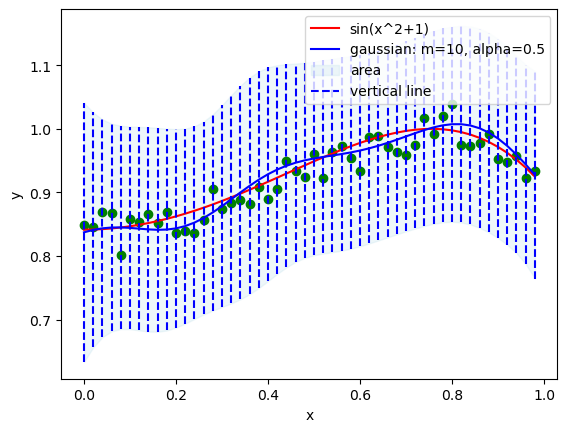

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11]
38


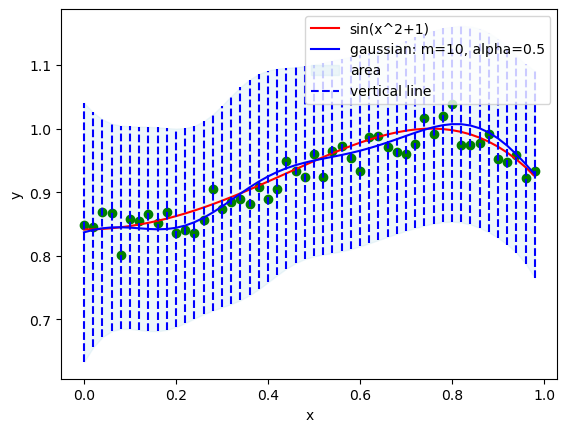

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24]
39


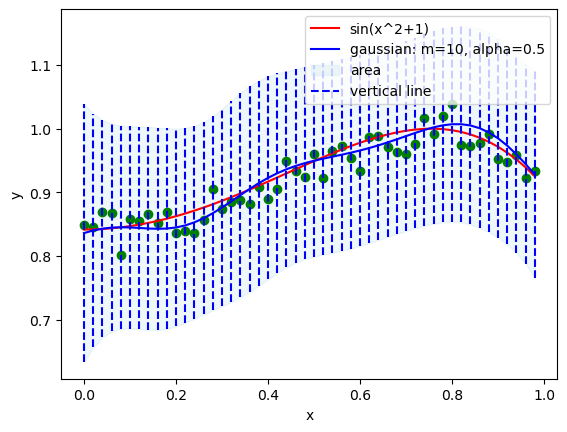

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19]
40


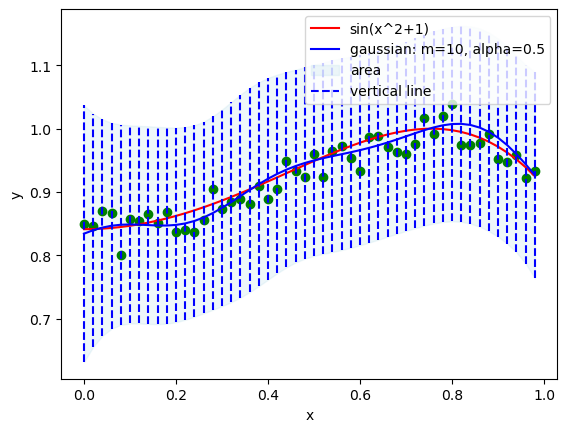

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7]
41


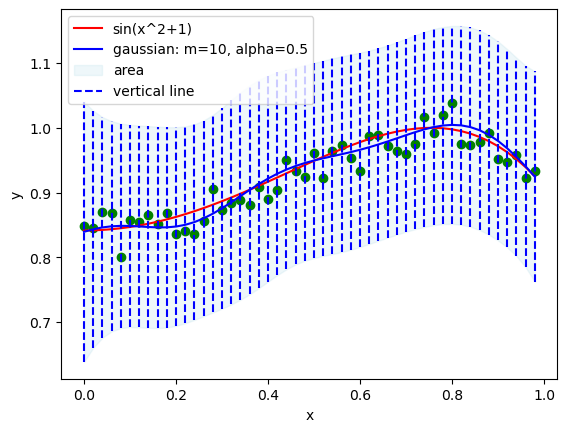

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45]
42


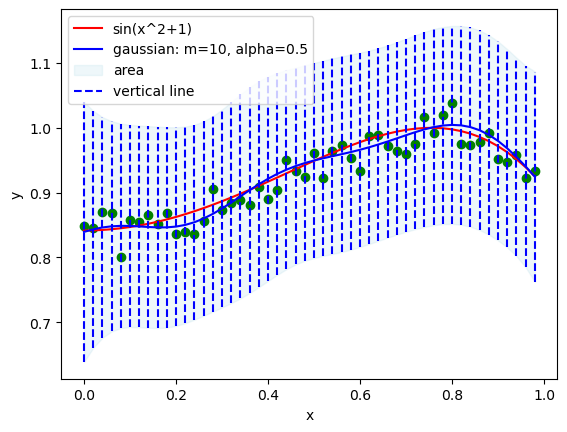

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45, 15]
43


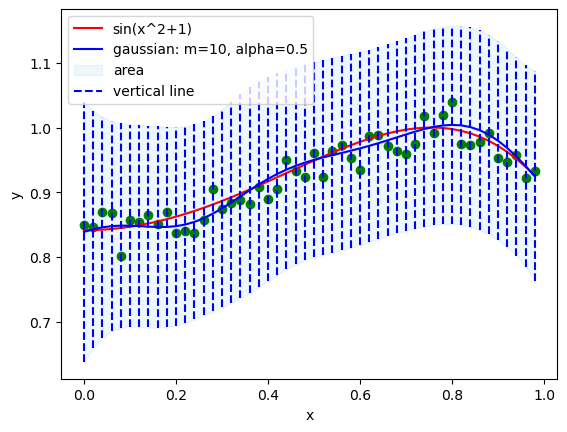

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45, 15, 31]
44


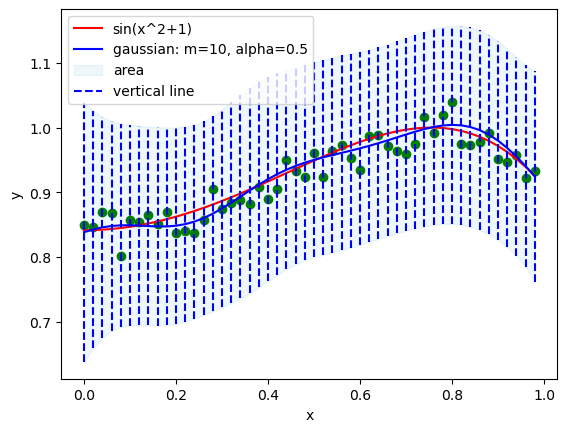

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45, 15, 31, 8]
45


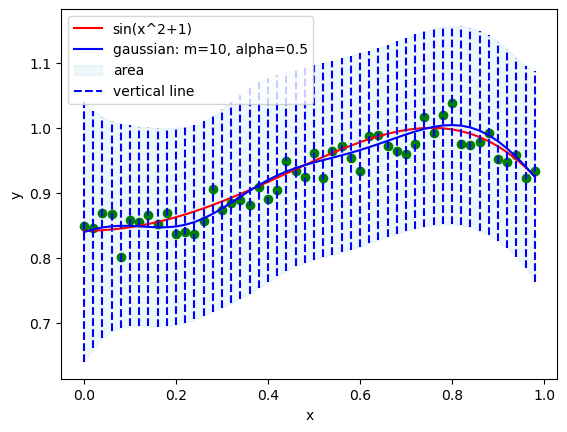

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45, 15, 31, 8, 26]
46


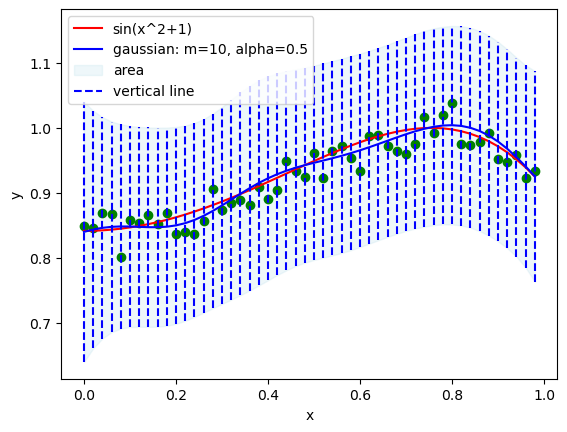

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45, 15, 31, 8, 26, 14]
47


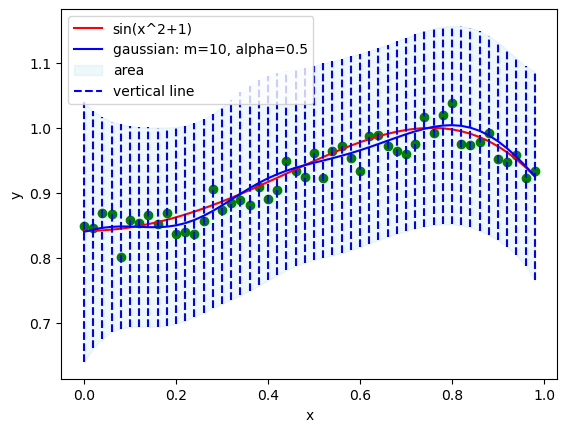

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45, 15, 31, 8, 26, 14, 47]
48


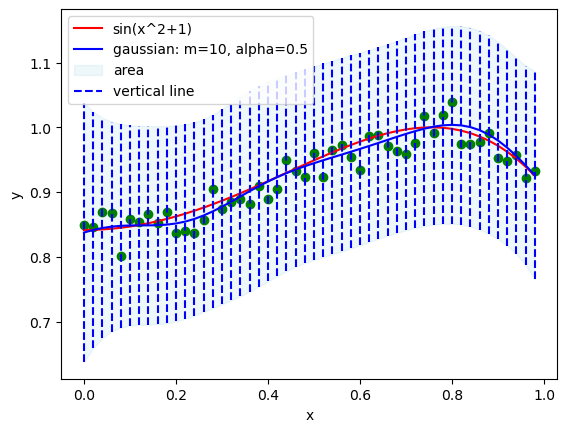

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45, 15, 31, 8, 26, 14, 47, 20]
49


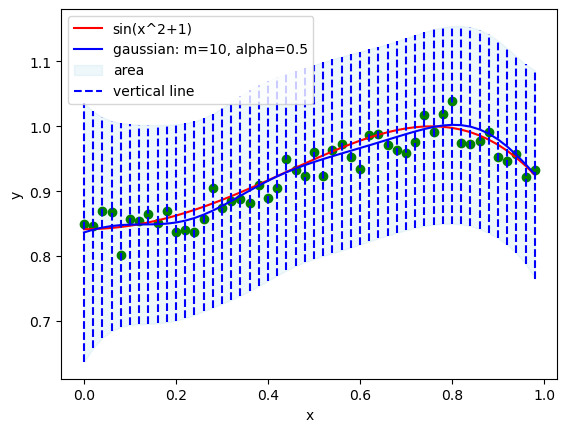

[49, 4, 37, 39, 22, 33, 29, 13, 38, 44, 8, 13, 26, 25, 38, 14, 25, 47, 40, 31, 33, 49, 23, 35, 11, 33, 34, 31, 31, 15, 25, 3, 32, 47, 3, 12, 43, 11, 24, 19, 7, 45, 15, 31, 8, 26, 14, 47, 20, 36]
50


In [146]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


def fi_fun(xn, M, m):
    mu = np.linspace(0, 1, M)
    sigma = 0.08
    item = -((xn - mu[m]) ** 2) / (2 * (sigma ** 2))
    result = math.exp(item)

    return result   
    
def my_full_Bayesian_predictive(x_select, x, y, M, alpha, beta):
    N = len(x_select)
    mx = np.zeros([N, 1])
    vy = np.zeros([N, 1])
    fi_square = np.zeros([N, M])
    alpha_square = np.zeros([M, M])
    row, col = np.diag_indices_from(alpha_square)
    alpha_square[row, col] = alpha

    for n in range(0, N):
        vy[n][0] = y[n]
        mx[n][0] = x_select[n]

    for n in range(N):
        for m in range(M):
            fi_square[n][m] = fi_fun(x_select[n], M, m)

    fi_square_T = fi_square.T
    fi_square_T_fi = np.dot(fi_square_T, fi_square)
    S_ = alpha_square + beta * fi_square_T_fi
    S_beta = beta * np.linalg.inv(S_)
    a = np.dot(fi_square_T, vy)

    #training
    m_N = np.dot(S_beta, a)
    S_N = np.linalg.inv(S_)

    #testing
    fi_x_list = np.zeros([M, 1])
    len_all = len(x)
    mu_list = np.zeros([1, len_all])
    sigma_list = np.zeros([1, len_all])
    for i in range(len_all):
        for m in range(M):
            fi_x_list[m][0] = fi_fun(x[i], M, m)
        mu = np.dot(m_N.T, fi_x_list)
        sigma_1 = np.dot(fi_x_list.T, S_N)
        sigma_2 = 1 / beta + np.dot(sigma_1, fi_x_list)
        sigma = math.sqrt(sigma_2)
        #         sigma /=15
        mu_list[0][i] = mu
        sigma_list[0][i] = sigma

    return mu_list, sigma_list


i_arr = []

# x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)

# def actual_distribution():
#     x = np.linspace(0, 1, 50)
#     y = np.sin(x ** 2 + 1)
#     return x, y
# 
# 
# def add_noice(y_curve):
#     mu = 0
#     sigma = 0.002
#     noise = np.random.normal(mu, sigma, len(y_curve))
#     y_noice = y_curve + noise
# 
#     return y_noice
# 
# 
# x_true, y_true = actual_distribution()
# x_noise = x_true
# y_noise = add_noice(y_true)
# 
# 

 
# import random
# 
# select_index = []
# for i in range(len(x_noise)):
#     #my_list = list(x_noise)
#     index = random.randint(0, 49)
#     select_index.append(index)
#     # select_index = random.sample(my_list, i)
# 
#     x_index = x_noise[select_index]
# 
#     x_ = np.array(x_index)
#     y_n = y_noise[select_index]
#     mu_list, sigma_list = my_full_Bayesian_predictive(x_select=x_, x=x_noise, y=y_n, M=30, alpha=1, beta=100)
# 
#     fig = plt.figure()
# 
#     plt.errorbar(x_noise, mu_list[0] + sigma_list[0], yerr=sigma_list[0], uplims=True, color='b')
# 
#     plt.errorbar(x_noise, mu_list[0] - sigma_list[0], yerr=sigma_list[0], lolims=True, color='b')
# 
#     #plt.errorbar(x_noise, mu_list[0], uplims=upperlimits, lolims=lowerlimits,label='mean')
#     plt.errorbar(x_noise, mu_list[0], label='mean')
#     print(select_index)
# 
#     plt.plot(x_true, y_true, 'r', x_true, y_noise, 'go')
#     plt.plot(x_true, y_true, 'ro')
#     plt.title('Predictive bayesian: len x = {}'.format(i + 1))
#     plt.show()